In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

start = '2015-01-01'
end = '2025-01-01'
stock = 'GOOG'

data = yf.download(stock, start, end)

data.reset_index(inplace=True)
data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2015-01-02,26.045292,26.365890,26.010056,26.253730,28951268
1,2015-01-05,25.502361,26.021471,25.462164,25.968368,41196796
2,2015-01-06,24.911289,25.616753,24.866129,25.558439,57998800
3,2015-01-07,24.868610,25.173524,24.796649,25.161415,41301082
4,2015-01-08,24.947023,24.986726,24.367368,24.714268,67071641
...,...,...,...,...,...,...
2511,2024-12-24,197.345184,197.445061,194.975874,195.946768,6809800
2512,2024-12-26,196.875717,197.934509,195.647106,196.516126,7907900
2513,2024-12-27,193.819183,196.576052,191.753543,196.246426,14693000


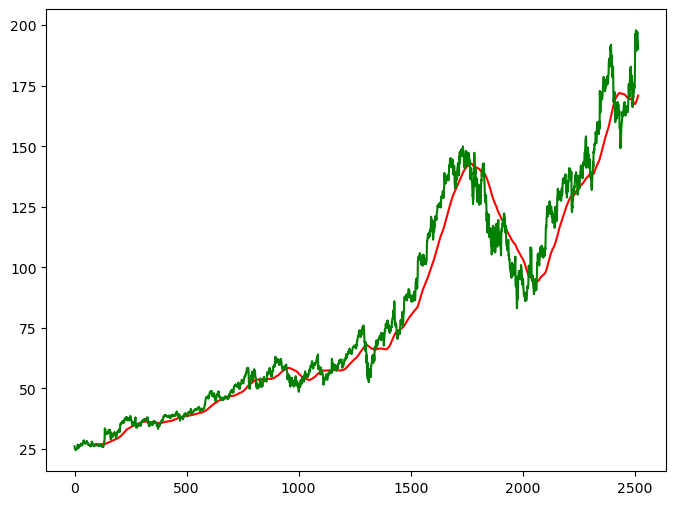

In [3]:
ma_100_days = data.Close.rolling(100).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

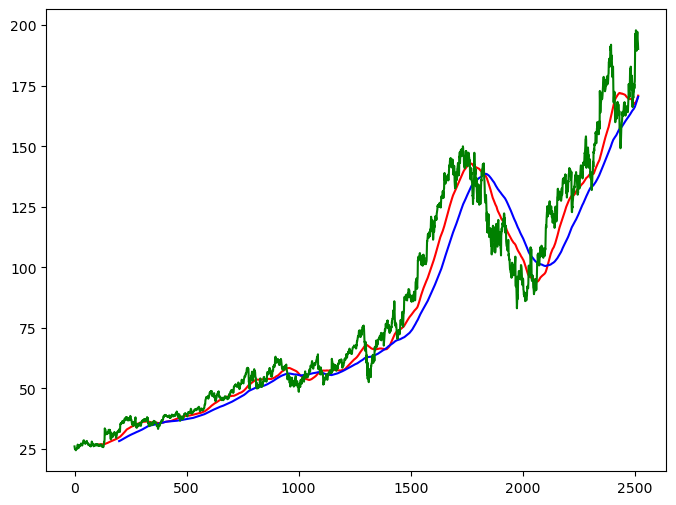

In [4]:
ma_200_days = data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [5]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [6]:
data_train.shape[0]

2012

In [7]:
data_test.shape[0]

504

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [9]:
data_train_scale = scaler.fit_transform(data_train)

In [10]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [11]:
x, y = np.array(x), np.array(y)

In [12]:
from keras.layers import Dense, Dropout, LSTM, Input
from keras.models import Sequential

In [13]:
model = Sequential()
model.add(Input(shape=(x.shape[1], 1)))
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [14]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 188ms/step - loss: 0.0726
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - loss: 0.0095
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - loss: 0.0075
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - loss: 0.0064
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 186ms/step - loss: 0.0069
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 25s 428ms/step - loss: 0.0056
Epoch 7/50
25/60 ━━━━━━━━━━━━━━━━━━━━ 20s 591ms/step - loss: 0.0050

In [ ]:
model.summary()